In [38]:
from helpers import * 
from processor import *

from rel import * 

ic| cut_vertices: [7, 0]
ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5862068965517242, -0.3620689655172414)}
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5402298850574713, 0.09770114942528735)}
ic| 'Passes planarity check'


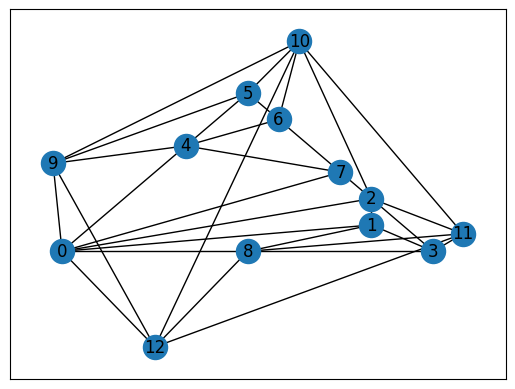

In [39]:
G_st = st_graph(seed=1) #  doesnt help when refresh.. 
p = Processor(G_st)
p.run()
pos = plot_planar(p.G, p.embed)

In [40]:
p.GraphData

GraphData{'graph': <networkx.classes.graph.Graph object at 0x147700d90>, 'embed': {0: array([-1.        , -0.36206897]), 1: array([ 0.37931034, -0.22413793]), 2: array([ 0.37931034, -0.0862069 ]), 3: array([ 0.65517241, -0.36206897]), 4: array([-0.44827586,  0.18965517]), 5: array([-0.17241379,  0.46551724]), 6: array([-0.03448276,  0.32758621]), 7: array([0.24137931, 0.05172414]), 8: array([-0.17241379, -0.36206897]), 9: array([-1.04022989,  0.09770115]), 10: array([0.05747126, 0.73563218]), 11: array([ 0.78735632, -0.27011494]), 12: array([-0.5862069 , -0.86206897])}, 'corner_node_data': {0: CornerNode({'interior_nodes': [0, 4, 5], 'name': 'west', 'node': 9, 'location': (-1.0402298850574714, 0.09770114942528735), 'mean_location': (-0.5402298850574713, 0.09770114942528735)}), 1: CornerNode({'interior_nodes': [5, 6, 2], 'name': 'north', 'node': 10, 'location': (0.05747126436781608, 0.735632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}), 2: CornerNode({'interi

In [41]:
p.GraphData.corner_node_data

{0: CornerNode({'interior_nodes': [0, 4, 5], 'name': 'west', 'node': 9, 'location': (-1.0402298850574714, 0.09770114942528735), 'mean_location': (-0.5402298850574713, 0.09770114942528735)}),
 1: CornerNode({'interior_nodes': [5, 6, 2], 'name': 'north', 'node': 10, 'location': (0.05747126436781608, 0.735632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}),
 2: CornerNode({'interior_nodes': [2, 3, 8], 'name': 'east', 'node': 11, 'location': (0.7873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)}),
 3: CornerNode({'interior_nodes': [8, 0], 'name': 'south', 'node': 12, 'location': (-0.5862068965517242, -0.8620689655172413), 'mean_location': (-0.5862068965517242, -0.3620689655172414)})}

In [42]:
p.GraphData.graph.nodes.data()

NodeDataView({0: {'corner_or_interior': 'interior', 'canonical_order': 7}, 1: {'corner_or_interior': 'interior', 'canonical_order': 9}, 2: {'corner_or_interior': 'interior', 'canonical_order': 8}, 3: {'corner_or_interior': 'interior', 'canonical_order': 10}, 4: {'corner_or_interior': 'interior', 'canonical_order': 5}, 5: {'corner_or_interior': 'interior', 'canonical_order': 3}, 6: {'corner_or_interior': 'interior', 'canonical_order': 4}, 7: {'corner_or_interior': 'interior', 'canonical_order': 6}, 8: {'corner_or_interior': 'interior', 'canonical_order': 11}, 9: {'corner_or_interior': 'corner', 'canonical_order': 2}, 10: {'corner_or_interior': 'corner', 'canonical_order': 2}, 11: {'corner_or_interior': 'corner', 'canonical_order': 12}, 12: {'corner_or_interior': 'corner', 'canonical_order': 1}})

In [43]:
# Create a directed graph
DG = nx.DiGraph()

In [54]:
def get_node_edges(G, node_to_find):
    # Find edges connected to the specified node
    return [(u, v) for u, v in G.edges() if u == node_to_find or v == node_to_find]

def rearrange_edges(edges, node, DIR="out"):
   if DIR=="in":
        return [(v, u) if u == node else (u, v) for u, v in edges]
   elif DIR=="out":
       return [(v,u) if v == node else (u,v) for u, v in edges]

In [78]:
# find eges of each corner node 
G = p.GraphData.graph
all_edges = []

for data in p.GraphData.corner_node_data.values():
    node = data.node
    name = data.name
    node_edges = get_node_edges(G, node)
    ic((node, name))
    
    if name == "south" or name == "west":
        DIR = "out"
        correct_edges = rearrange_edges(node_edges, node, DIR)
        ic((node,correct_edges, DIR, "\n" ))
        all_edges.extend(correct_edges)
    elif name == "east" or name == "north":
        DIR= "in"
        correct_edges = rearrange_edges(node_edges, node, DIR)
        ic((node,correct_edges, DIR, "\n" ))
        all_edges.extend(correct_edges)

edge_set = set(all_edges)
DG.add_edges_from(list(edge_set))

ic| (node, name): (9, 'west')


ic| (node,correct_edges, DIR, "\n" ): (9, [(9, 0), (9, 4), (9, 5), (9, 10), (9, 12)], 'out', '
                                      ')
ic| (node, name): (10, 'north')
ic| (node,correct_edges, DIR, "\n" ): (10, [(2, 10), (5, 10), (6, 10), (9, 10), (11, 10), (12, 10)], 'in', '
                                      ')
ic| (node, name): (11, 'east')
ic| (node,correct_edges, DIR, "\n" ): (11, [(2, 11), (3, 11), (8, 11), (10, 11), (12, 11)], 'in', '
                                      ')
ic| (node, name): (12, 'south')
ic| (node,correct_edges, DIR, "\n" ): (12, [(12, 0), (12, 8), (12, 9), (12, 10), (12, 11)], 'out', '
                                      ')


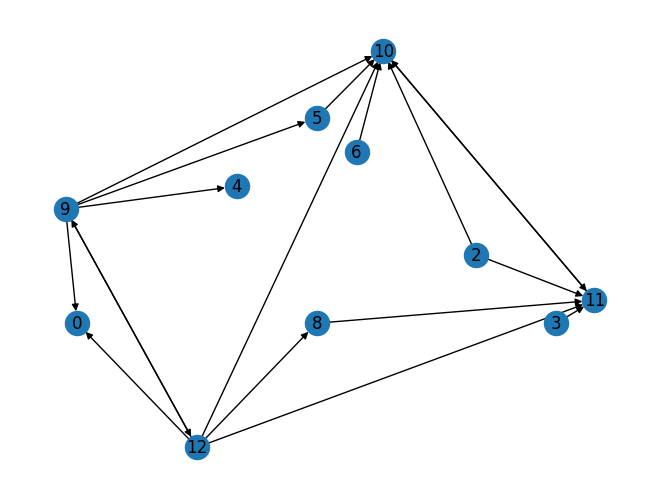

In [77]:
embed = p.GraphData.embed
nx.draw(DG, pos=embed, with_labels=True, arrows=True)